In [1]:
import os

In [2]:
%pwd

'd:\\Chest-Cancer-Classification\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\Chest-Cancer-Classification'

In [5]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Function to load images and labels
def load_images_and_labels(base_dir, class_names):
    images = []
    labels = []

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize images
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [7]:
# Function to extract features from an image
def extract_features(images):
    feature_list = []

    for img in images:
        
        fd, _ = hog(img, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=True)
        feature_list.append(fd)

    return np.array(feature_list)

In [8]:
# Define your class names
class_names = ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']  # Replace with your class names

In [9]:
# Load images and labels
train_images, train_labels = load_images_and_labels('artifacts/data_ingestion/train', class_names)
test_images, test_labels = load_images_and_labels('artifacts/data_ingestion/valid', class_names)


In [10]:
# Extract features
train_features = extract_features(train_images)
test_features = extract_features(test_images)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Define your class names
class_names = ['Adenocarcinoma', 'Large cell carcinoma', 'normal', 'Squamous cell carcinoma']  # Replace with your class names

In [13]:
!pip install joblib

In [14]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
import joblib

Random Forest Metrics:
Accuracy: 0.7222222222222222
Precision: 0.7625
Recall: 0.7480331262939959
F1 Score: 0.7386580086580087


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.83      0.48      0.61        21
           2       1.00      1.00      1.00        13
           3       0.55      0.73      0.63        15

    accuracy                           0.72        72
   macro avg       0.76      0.75      0.74        72
weighted avg       0.75      0.72      0.72        72

SVM Metrics:
Accuracy: 0.8472222222222222
Precision: 0.8543650793650794
Recall: 0.8694616977225673
F1 Score: 0.8551712714503412


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.89      0.76      0.82        21
           2       0.93      1.00      0.96        13
           3       0.70      0.93      0.8

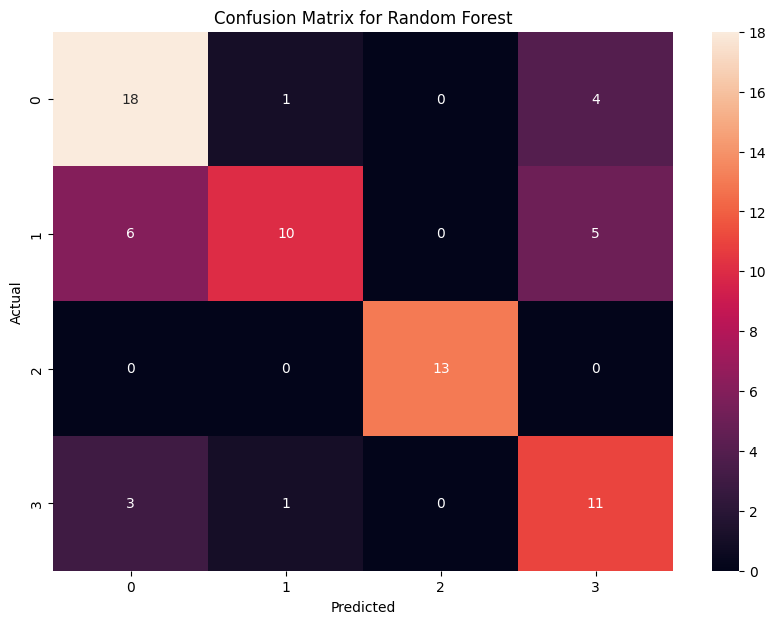

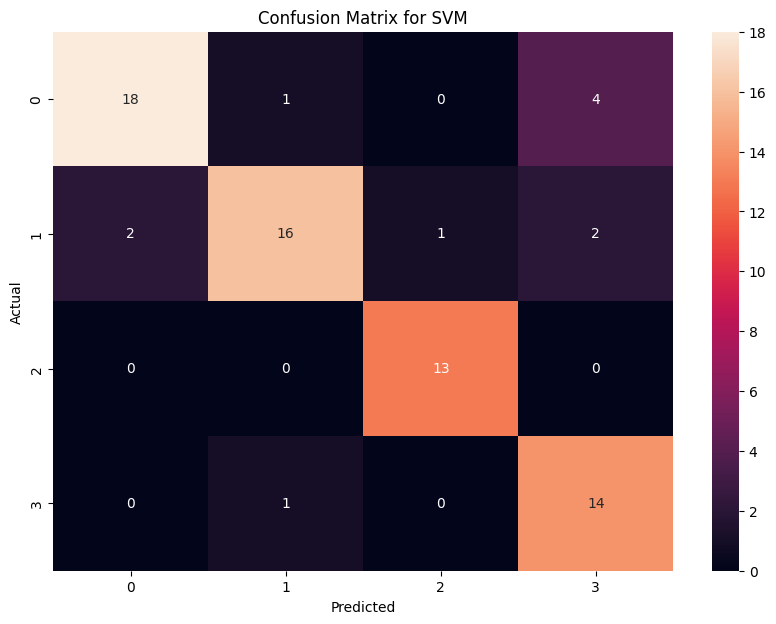

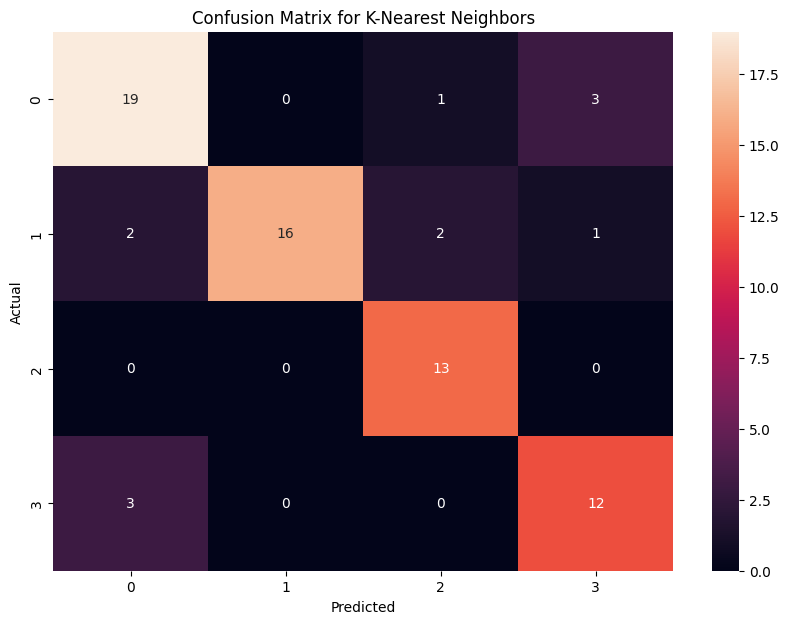

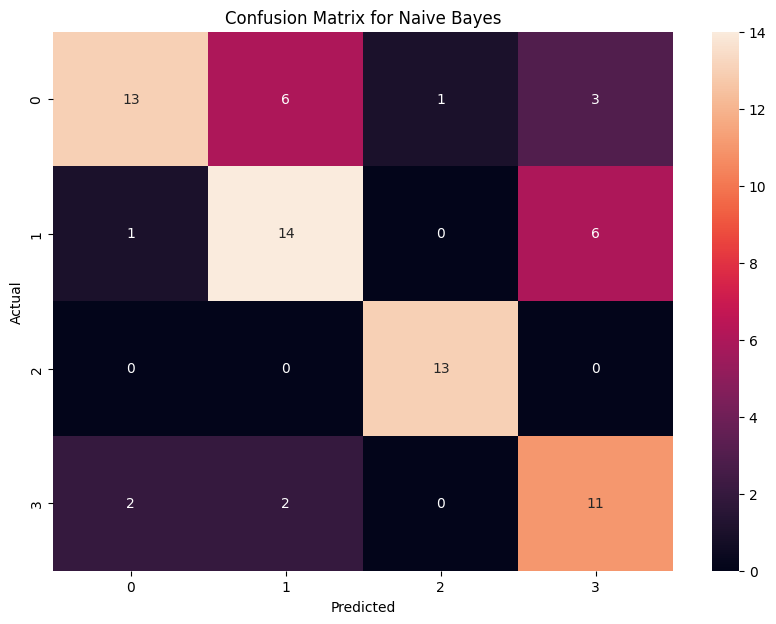

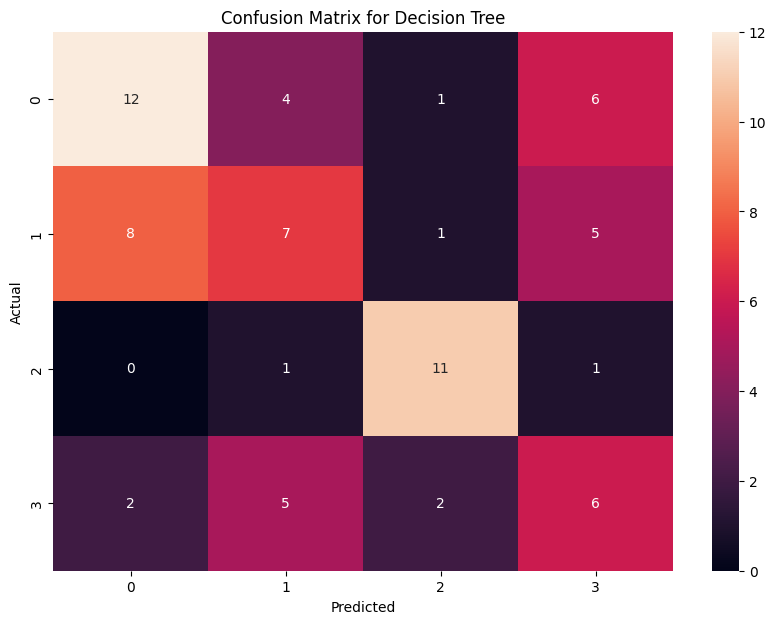

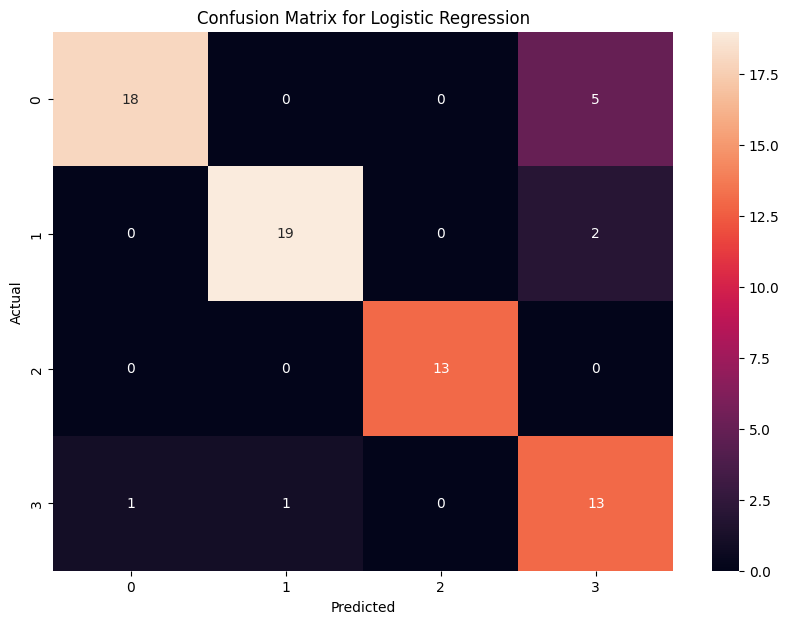

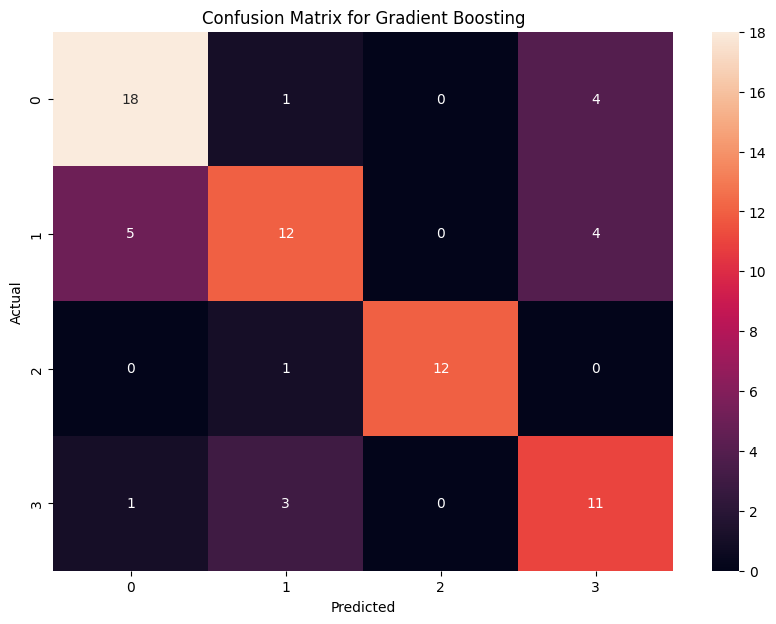

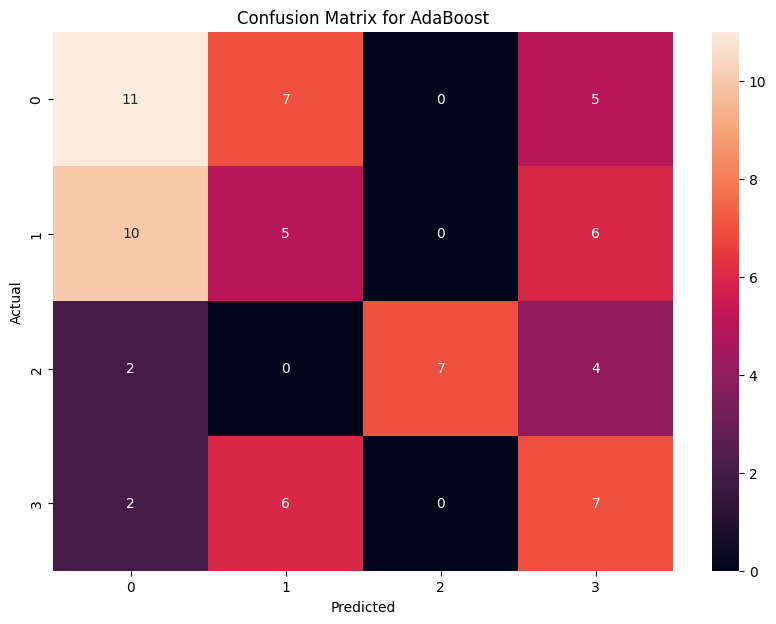

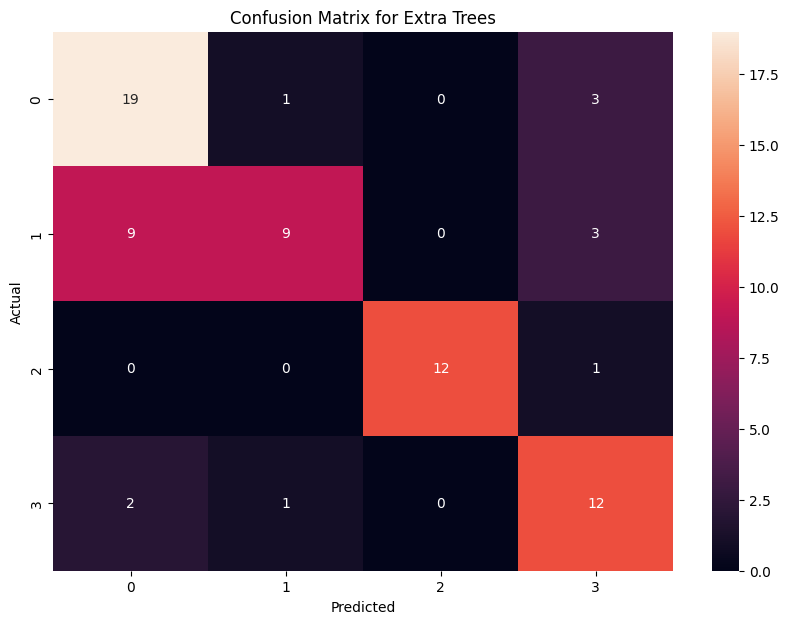

In [16]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100)
}

def append_to_csv(clf_name, accuracy, precision, recall, f1_score):
    results_file = os.path.join("results", 'results.csv')
    new_row = {'Model': clf_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

    if not os.path.isfile(results_file):
        pd.DataFrame([new_row]).to_csv(results_file, index=False)
    else:
        pd.DataFrame([new_row]).to_csv(results_file, mode='a', header=False, index=False)

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(train_features, train_labels)
    y_pred = clf.predict(test_features)
    
    # Save the trained model
    model_filename = f"results/{clf_name.replace(' ', '_')}_model.joblib"
    joblib.dump(clf, model_filename)
    
    
    # Compute metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='macro')
    recall = recall_score(test_labels, y_pred, average='macro')
    f1 = f1_score(test_labels, y_pred, average='macro')

    # Print metrics
    print(f"{clf_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Save Confusion Matrix
    plt.savefig(f'results/confusion_matrix_{clf_name}.png')
    
    print("\nClassification Report:\n", classification_report(test_labels, y_pred))
    
    append_to_csv(clf_name, accuracy, precision, recall, f1)

In [17]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define classifiers and hyperparameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), 
                            {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}),
    'SVM': (SVC(), 
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), 
                            {'n_neighbors': [3, 5, 11], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), 
                      {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), 
                      {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}),
    'Gradient Boosting': (GradientBoostingClassifier(), 
                          {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}),
    'Naive Bayes': (GaussianNB(), {})
}

def perform_grid_search(clf, params, X_train, y_train):
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def append_to_csv_ht(clf_name, accuracy, precision, recall, f1_score):
    results_file = os.path.join("results", 'results.csv')
    clf_name = clf_name + "_Hyperparam_tuning"
    new_row = {'Model': clf_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

    if not os.path.isfile(results_file):
        pd.DataFrame([new_row]).to_csv(results_file, index=False)
    else:
        pd.DataFrame([new_row]).to_csv(results_file, mode='a', header=False, index=False)

# Create a directory for results if it doesn't exist
os.makedirs("results", exist_ok=True)

# Perform hyperparameter tuning and evaluation for each classifier
for clf_name, (clf, params) in classifiers.items():
    print(f"Processing {clf_name}...")
    best_clf = perform_grid_search(clf, params, train_features, train_labels)
    y_pred = best_clf.predict(test_features)
    
    
    # Save the trained model
    model_filename = f"results/{clf_name.replace(' ', '_')}_model_Hyperparameter_Tuning.joblib"
    joblib.dump(best_clf, model_filename)

    # Compute and print metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='macro')
    recall = recall_score(test_labels, y_pred, average='macro')
    f1 = f1_score(test_labels, y_pred, average='macro')
    
    print(f"{clf_name} Metrics (After Hyperparameter tuning):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    
    # print(f"{clf_name}_Hyperparameter_tuning Metrics: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}\n")
    
    # Confusion Matrix and save it
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'results/confusion_matrix_{clf_name}_Hyperparameter_tuning.png')
    plt.close()
    
    append_to_csv_ht(clf_name, accuracy, precision, recall, f1)

print("All models processed. Results saved to 'results/results.csv'.")

Processing Logistic Regression...
Logistic Regression Metrics (After Hyperparameter tuning):
Accuracy: 0.8472222222222222
Precision: 0.8579622132253711
Recall: 0.86213569039656
F1 Score: 0.8519993894993896

Processing SVM...
SVM Metrics (After Hyperparameter tuning):
Accuracy: 0.9166666666666666
Precision: 0.9223057644110275
Recall: 0.9316770186335404
F1 Score: 0.9228609625668449

Processing K-Nearest Neighbors...
K-Nearest Neighbors Metrics (After Hyperparameter tuning):
Accuracy: 0.8333333333333334
Precision: 0.8472714237516868
Recall: 0.8491957318044274
F1 Score: 0.841481945987578

Processing Decision Tree...
Decision Tree Metrics (After Hyperparameter tuning):
Accuracy: 0.5138888888888888
Precision: 0.5280257936507936
Recall: 0.5419732441471572
F1 Score: 0.5320184788269895

Processing Random Forest...


d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\C

Random Forest Metrics (After Hyperparameter tuning):
Accuracy: 0.75
Precision: 0.7848519147330693
Recall: 0.7782608695652175
F1 Score: 0.7522875816993464

Processing Gradient Boosting...
Gradient Boosting Metrics (After Hyperparameter tuning):
Accuracy: 0.7638888888888888
Precision: 0.7841024663107043
Recall: 0.7811833094441789
F1 Score: 0.7787894288150043

Processing Naive Bayes...
Naive Bayes Metrics (After Hyperparameter tuning):
Accuracy: 0.7083333333333334
Precision: 0.7318587662337661
Recall: 0.741304347826087
F1 Score: 0.7273409622246833

All models processed. Results saved to 'results/results.csv'.


In [18]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Load the trained models
model_names = ["Random_Forest", "SVM", "K-Nearest_Neighbors", "Naive_Bayes", "Decision_Tree", "Logistic_Regression", "Gradient_Boosting", "AdaBoost", "Extra_Trees"]
classifiers = {name: joblib.load(f"results/{name}_model.joblib") for name in model_names}

# Create ensemble classifiers
classifiers_for_voting = [(name, clf) for name, clf in classifiers.items()]

# Hard Voting Classifier
hard_voting_clf = VotingClassifier(estimators=classifiers_for_voting, voting='hard')
hard_voting_clf.fit(train_features, train_labels)
y_pred_hard = hard_voting_clf.predict(test_features)

# Soft Voting Classifier
soft_voting_clf = VotingClassifier(estimators=classifiers_for_voting, voting='soft')
soft_voting_clf.fit(train_features, train_labels)
y_pred_soft = soft_voting_clf.predict(test_features)

# DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)"])

# Store results of hard voting
hard_report = classification_report(test_labels, y_pred_hard, output_dict=True)
hard_df = pd.DataFrame({
    "Model": ["Hard Voting"],
    "Accuracy": [hard_report['accuracy']],
    "Precision": [hard_report['macro avg']['precision']],
    "Recall": [hard_report['macro avg']['recall']],
    "F1-Score": [hard_report['macro avg']['f1-score']],
    "Training Time (s)": [None]
})
results_df = pd.concat([results_df, hard_df], ignore_index=True)

# Store results of soft voting
soft_report = classification_report(test_labels, y_pred_soft, output_dict=True)
soft_df = pd.DataFrame({
    "Model": ["Soft Voting"],
    "Accuracy": [soft_report['accuracy']],
    "Precision": [soft_report['macro avg']['precision']],
    "Recall": [soft_report['macro avg']['recall']],
    "F1-Score": [soft_report['macro avg']['f1-score']],
    "Training Time (s)": [None]
})


results_df = pd.concat([results_df, soft_df], ignore_index=True)

# Save results to CSV
results_df.to_csv('results/voting_classifier_results.csv', index=False)

# Optionally, print the results
print(results_df)


         Model  Accuracy  Precision    Recall  F1-Score Training Time (s)
0  Hard Voting  0.861111   0.875067  0.874534  0.868463              None
1  Soft Voting  0.819444   0.832895  0.836128  0.830895              None


C:\Users\priya\AppData\Local\Temp\ipykernel_19956\4027754284.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, hard_df], ignore_index=True)
